In [1]:
import acquire
import prepare
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score


warnings.filterwarnings("ignore")

In [2]:
df = acquire.get_telco_data()

In [3]:
df = prepare.prep_telco(df)

In [4]:
train, validate, test = prepare.my_split(df, target='churn')

In [5]:
train.head().T

,810,3623,6074,4250,2377
customer_id,1179-INLAT,5135-RDDQL,8610-WFCJF,5993-BQHEA,3402-XRIUO
senior_citizen,0,0,0,0,1
tenure,3,63,49,12,22
monthly_charges,19.45,50.65,95.6,20.05,63.55
total_charges,69.25,3221.25,4783.5,267.0,1381.8
male,1,0,0,1,0
partner,0,1,1,0,1
dependents,0,1,1,0,0
phone,1,1,1,1,1
paperless_billing,1,1,1,0,1


In [6]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
features = ['monthly_charges',
             'phone',
             'paperless_billing',
             'contract_type_month-to-month',
             'contract_type_one_year',
             'contract_type_two_year',
             'payment_type_bank_transfer_auto',
             'payment_type_credit_card_auto',
             'payment_type_electronic_check',
             'payment_type_mailed_check',
             'internet_type_dsl',
               'internet_type_fiber_optic',
              'internet_type_none']

In [50]:
X_train = train[features]
y_train = train.churn

X_validate = validate[features]
y_validate = validate.churn

In [51]:
# create a function to test/fit Random Forest Classifier and output status to report array
def rff(s,d):
    '''
    creates an RF classifier of specified min_samples_leaf and max_depth
    accepts two ints for min_samples and max_depth
    
    
    '''
    rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=s,
                            n_estimators=100,
                            max_depth=d, 
                            random_state=123)

    rf.fit(X_train, y_train)
    t_acc = rf.score(X_train, y_train)
    v_acc = rf.score(X_validate, y_validate)
    
    #print('Accuracy of RFF classifier on training set:', t_acc)
    #print('Accuracy of RFF classifier on validate set:', v_acc)
    
    report.append([s, d, t_acc, v_acc])

In [52]:
report = []
for s in range(10,40):
    for d in range(5,45):
        rff(s,d)

In [53]:
report_df = pd.DataFrame(report, columns=['min_samples_leaf', 'max_depth', 'train_accuracy', 'validate_accuracy'])


In [46]:
report_df['difference'] = abs(report_df.train_accuracy - report_df.validate_accuracy)

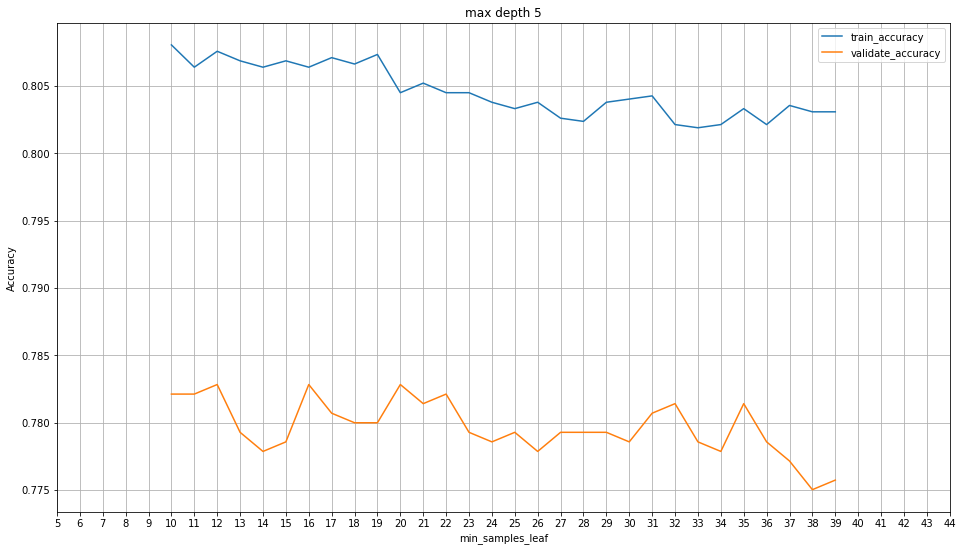

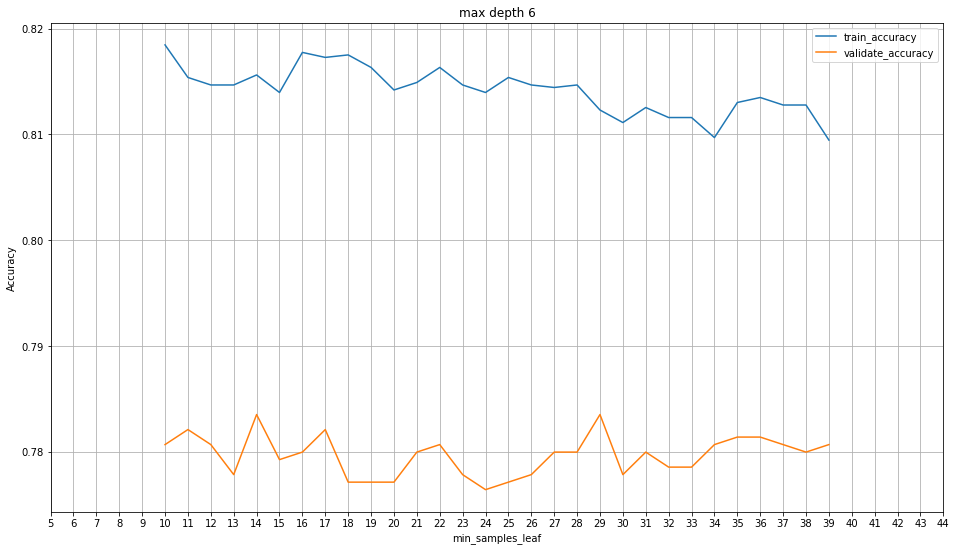

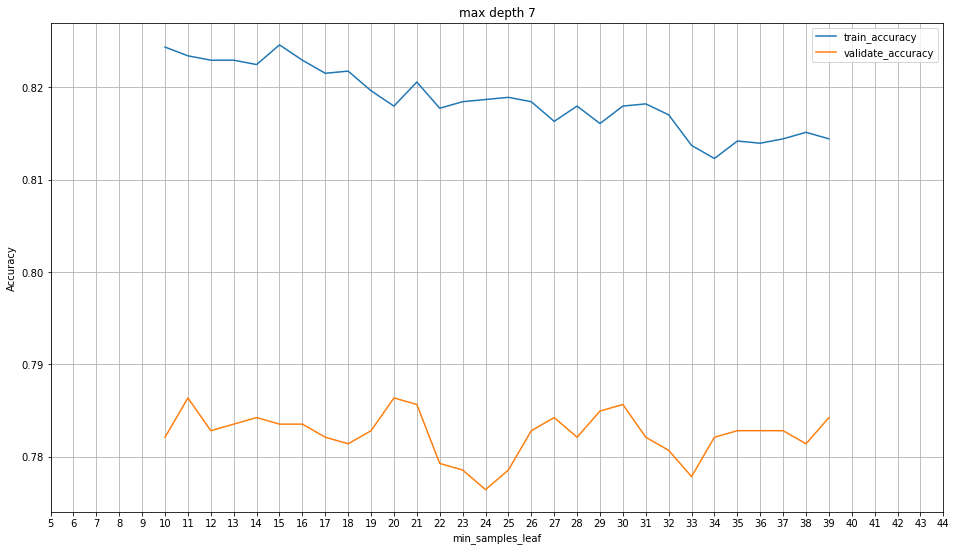

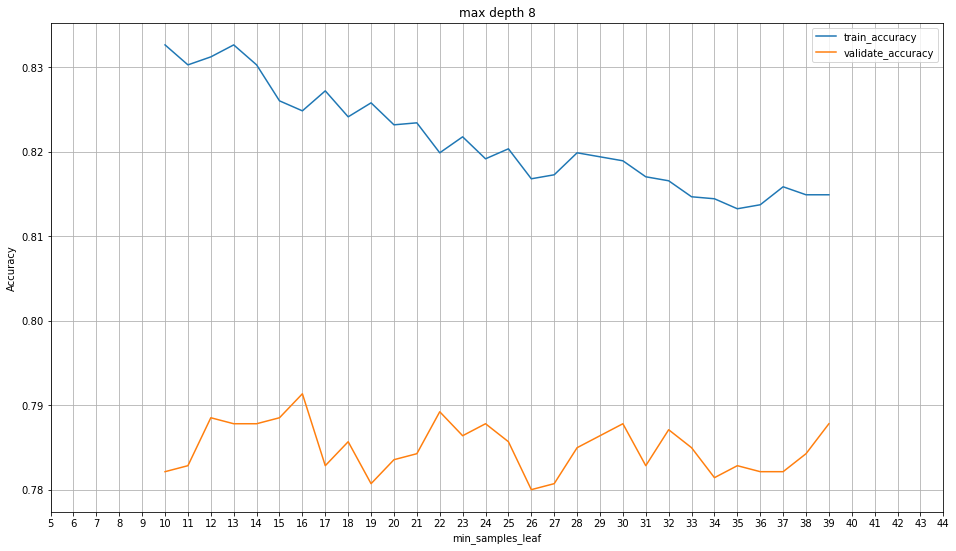

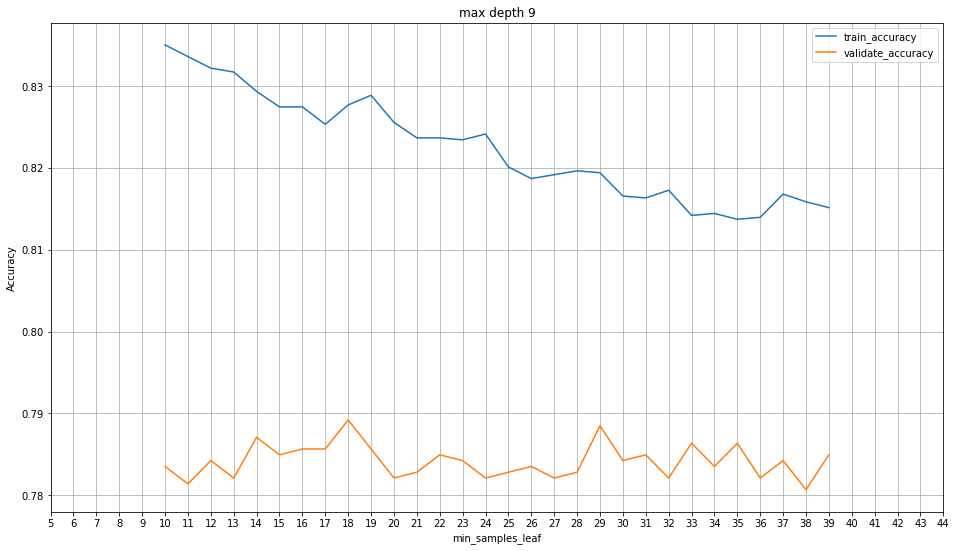

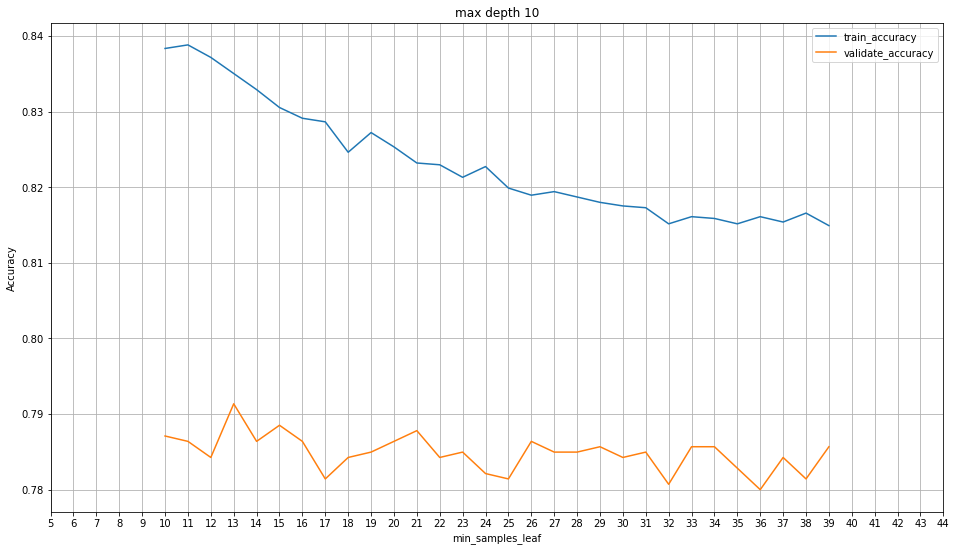

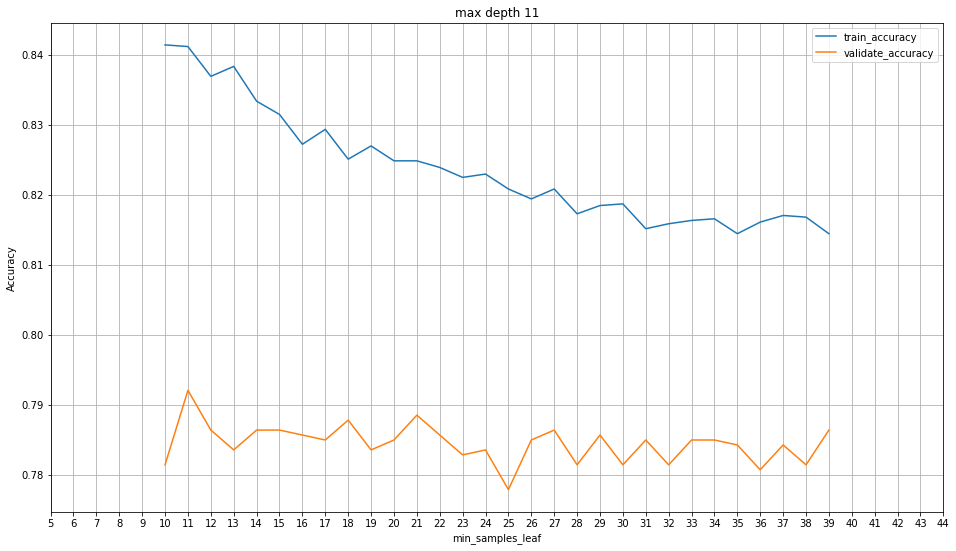

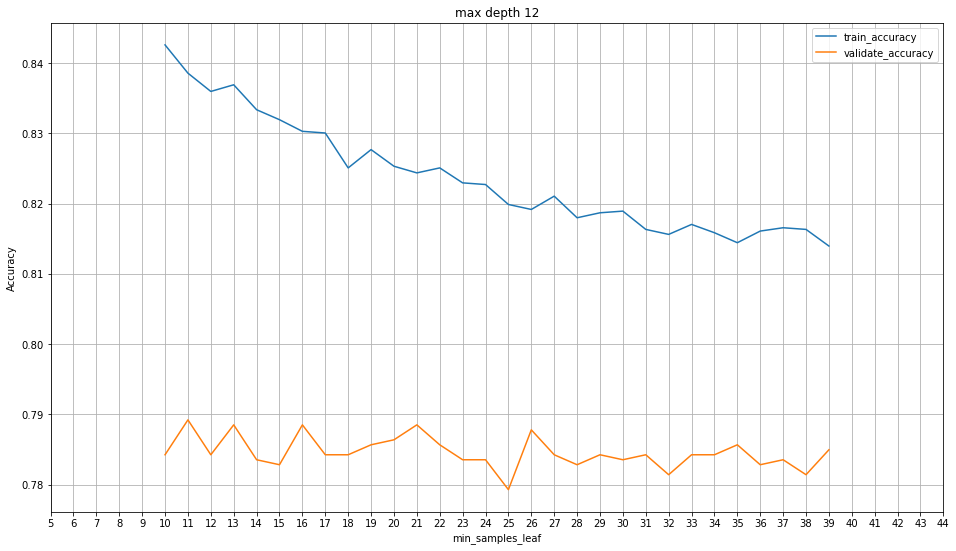

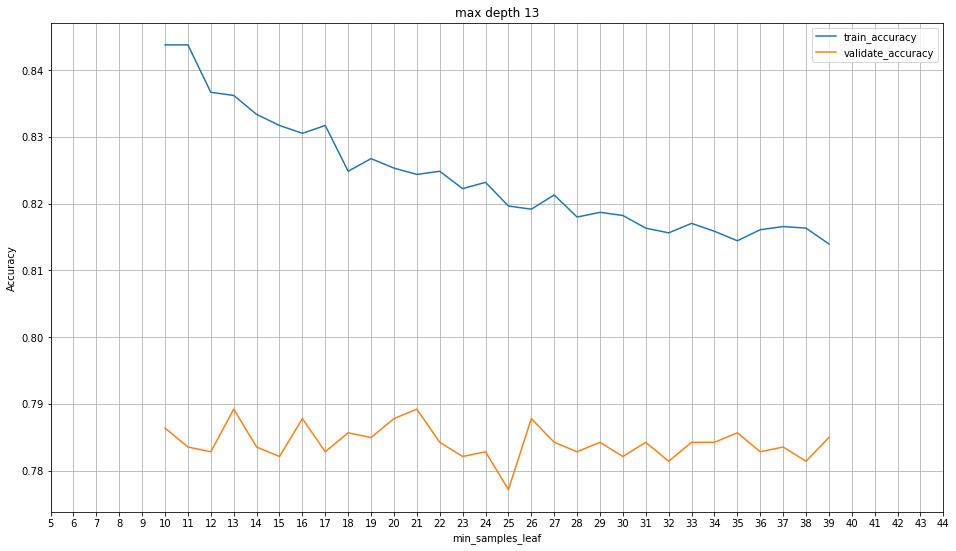

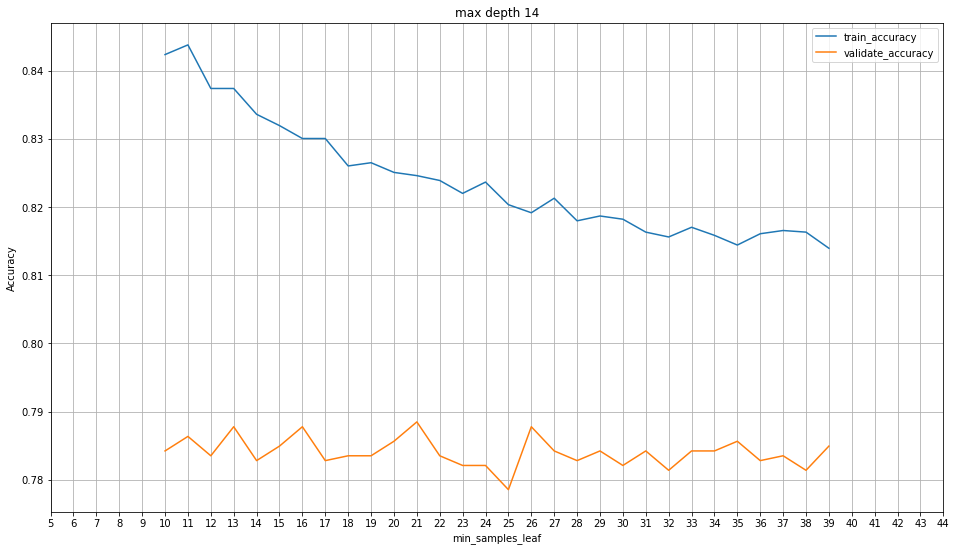

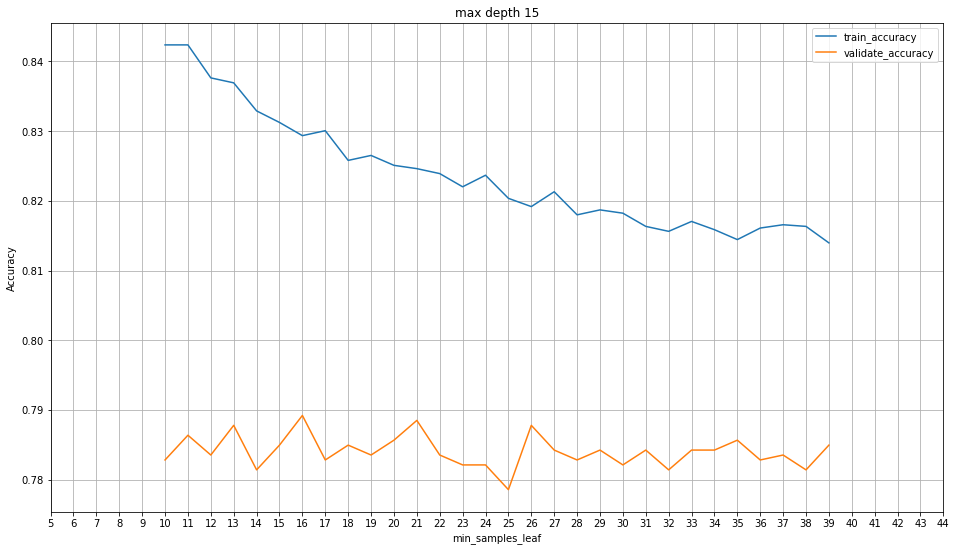

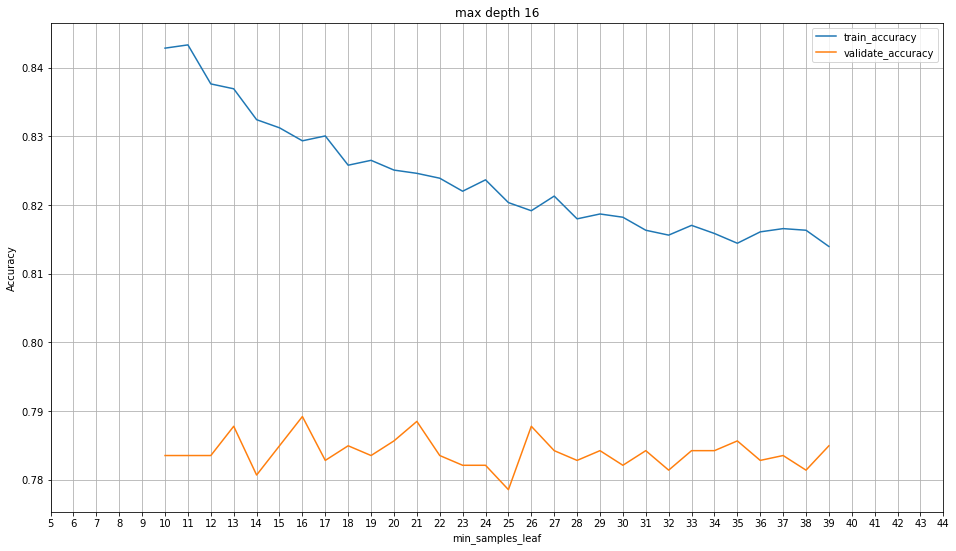

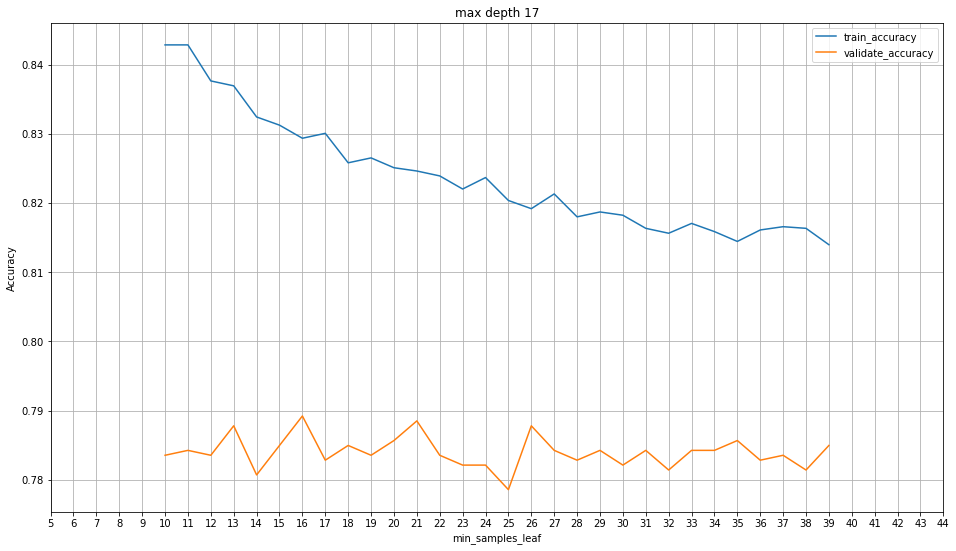

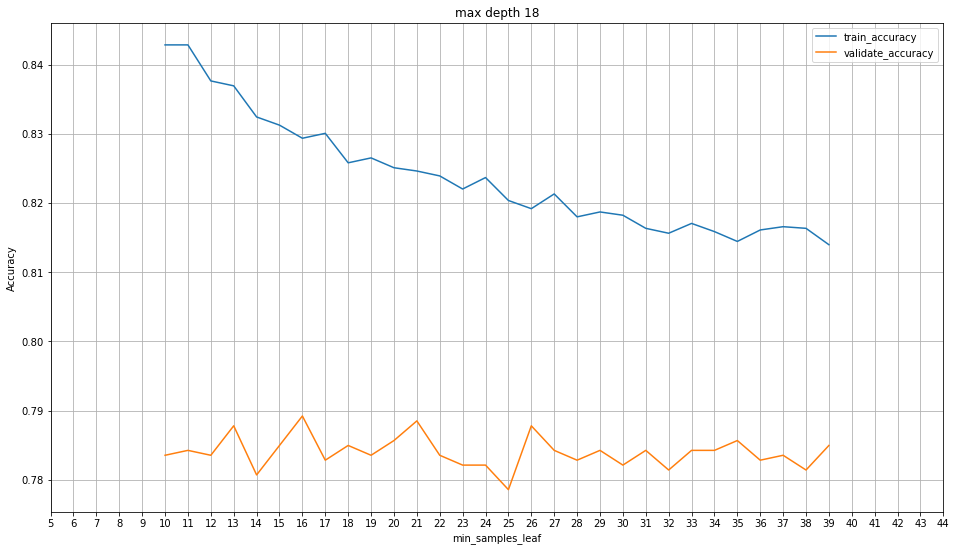

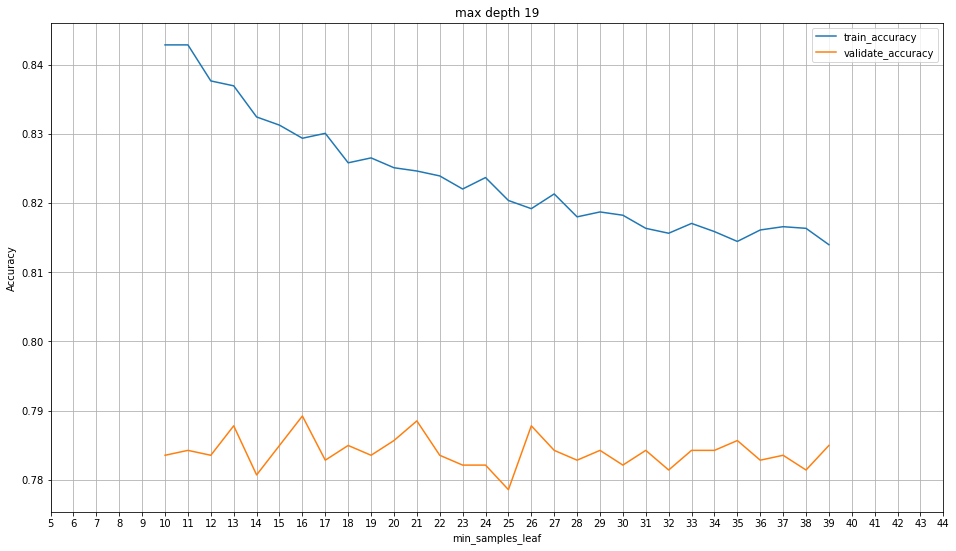

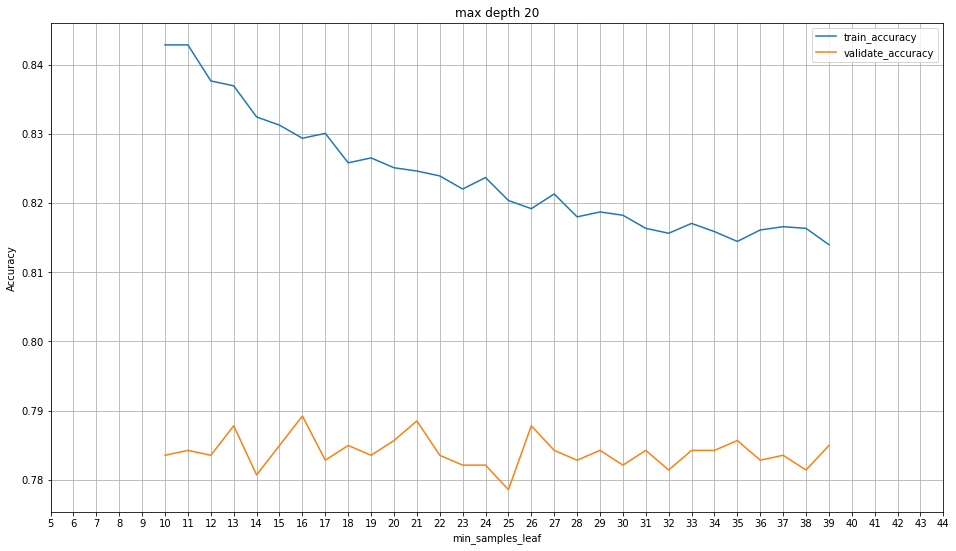

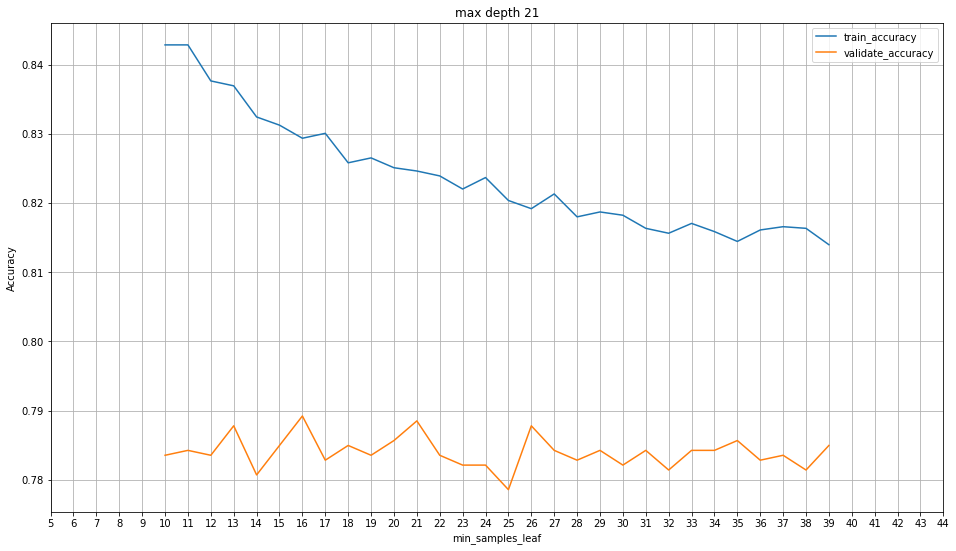

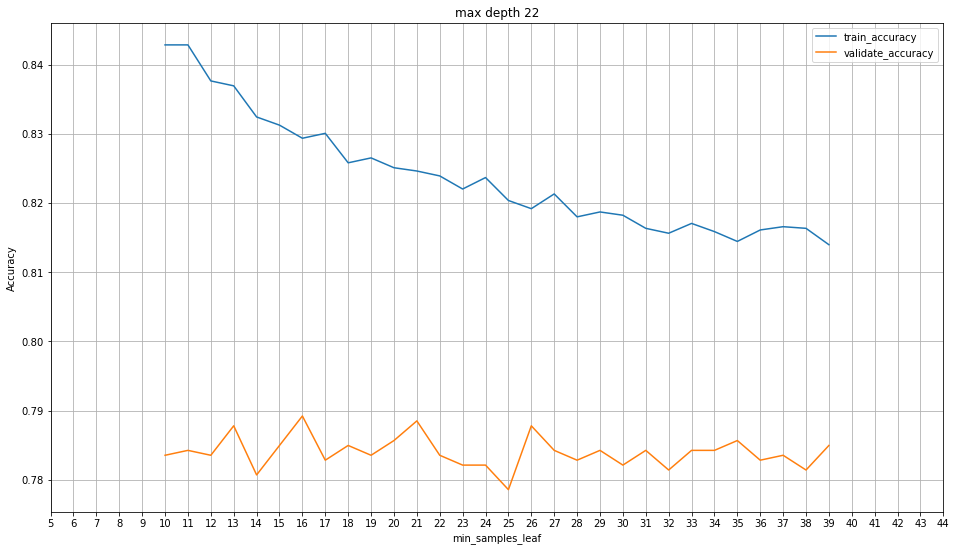

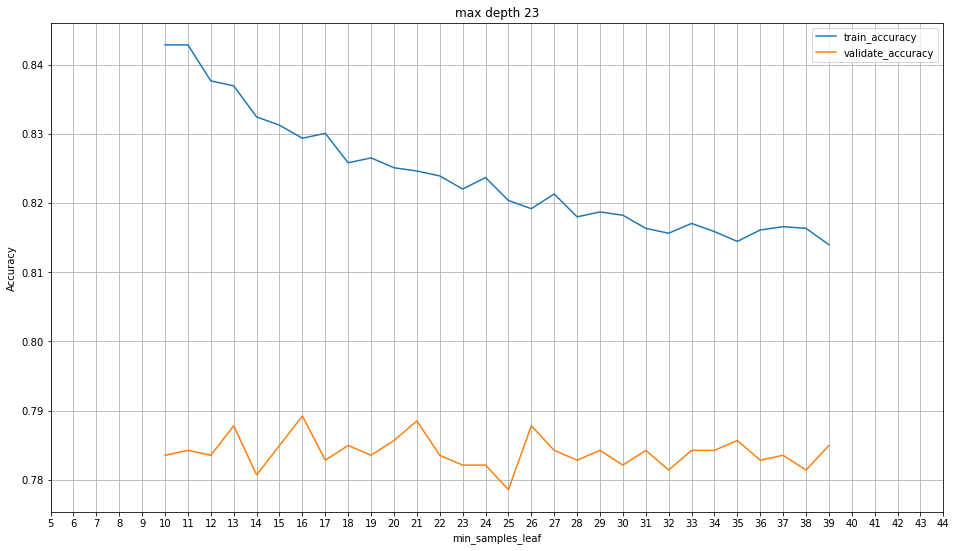

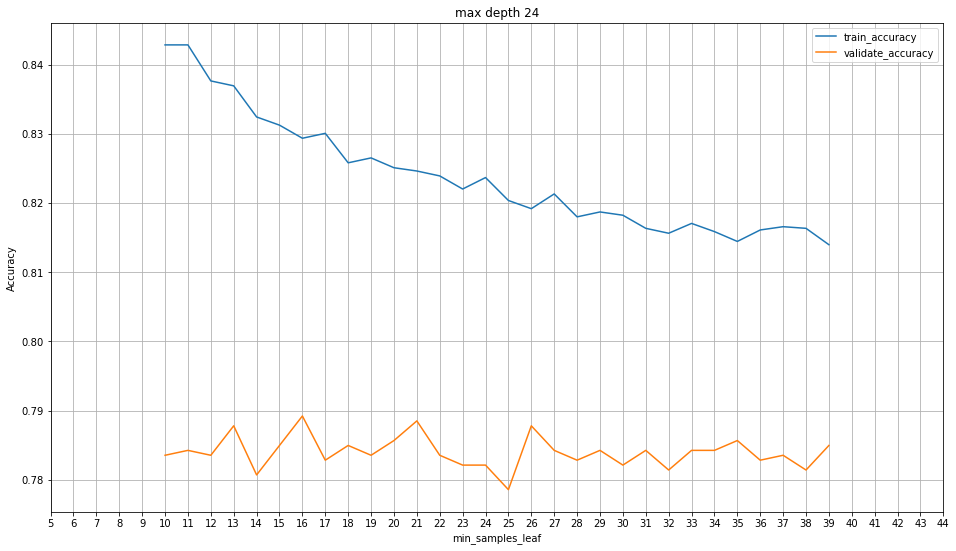

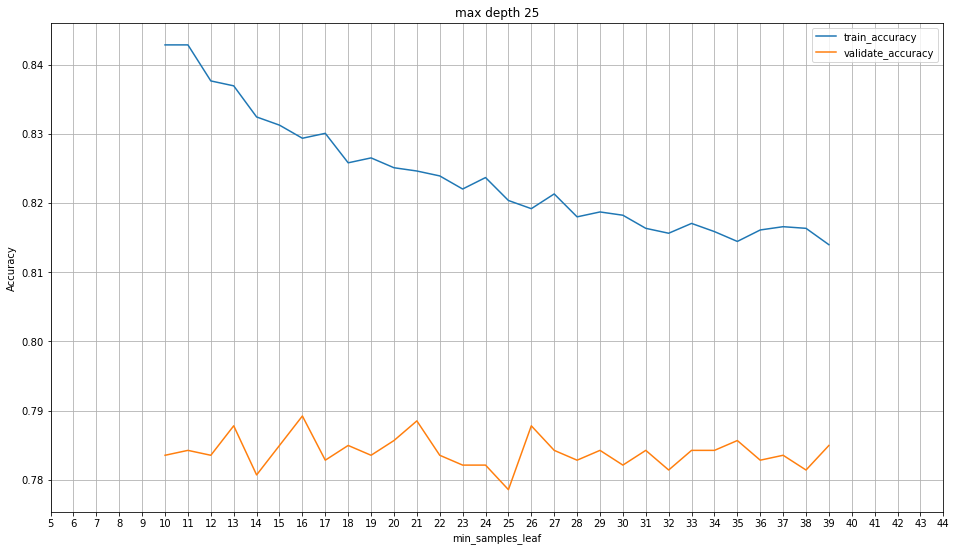

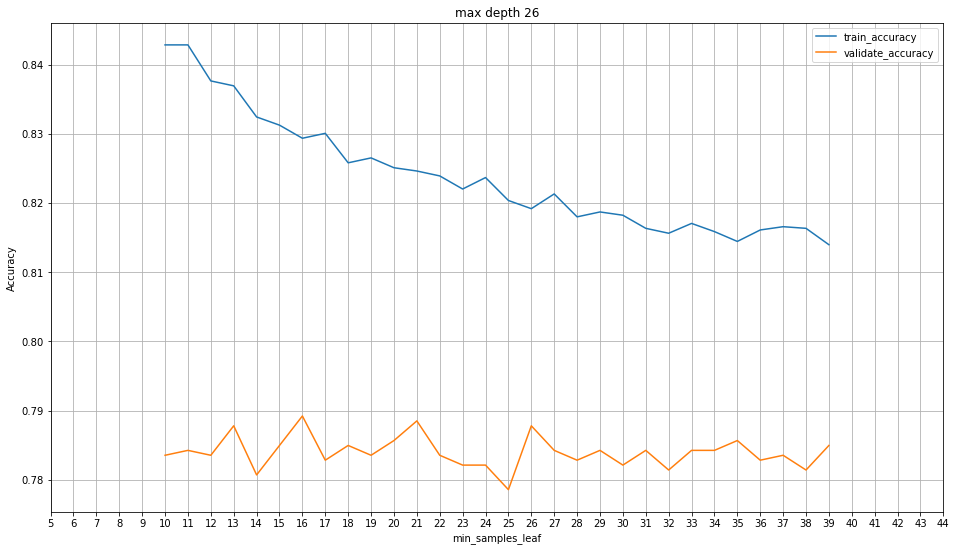

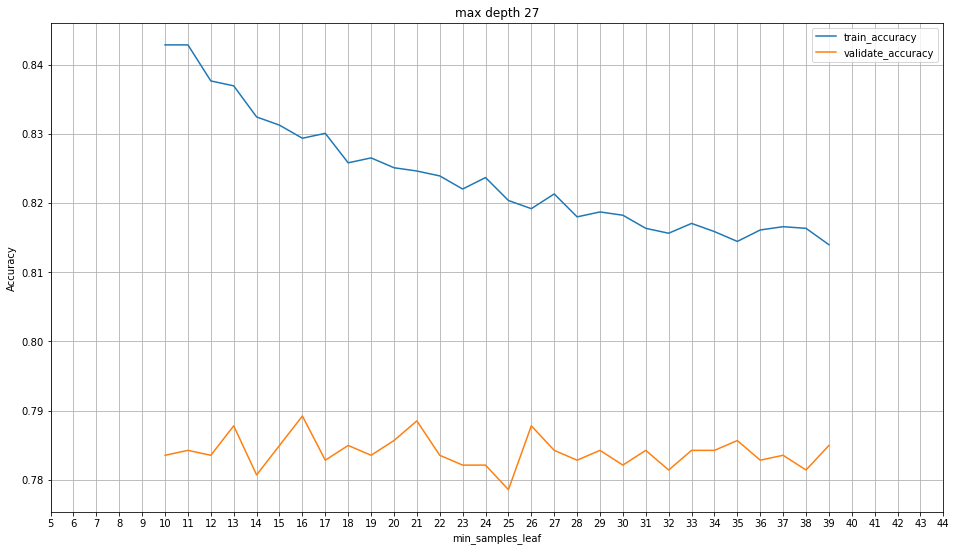

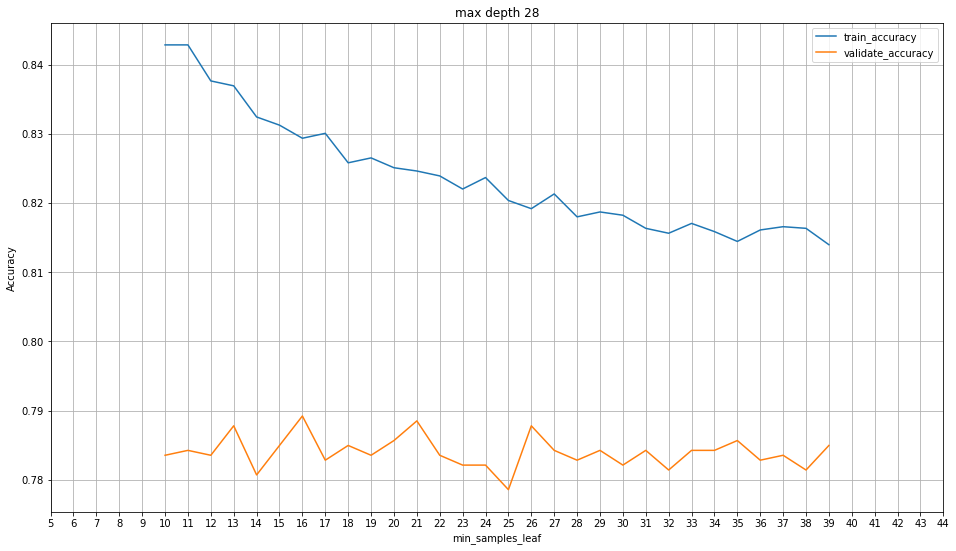

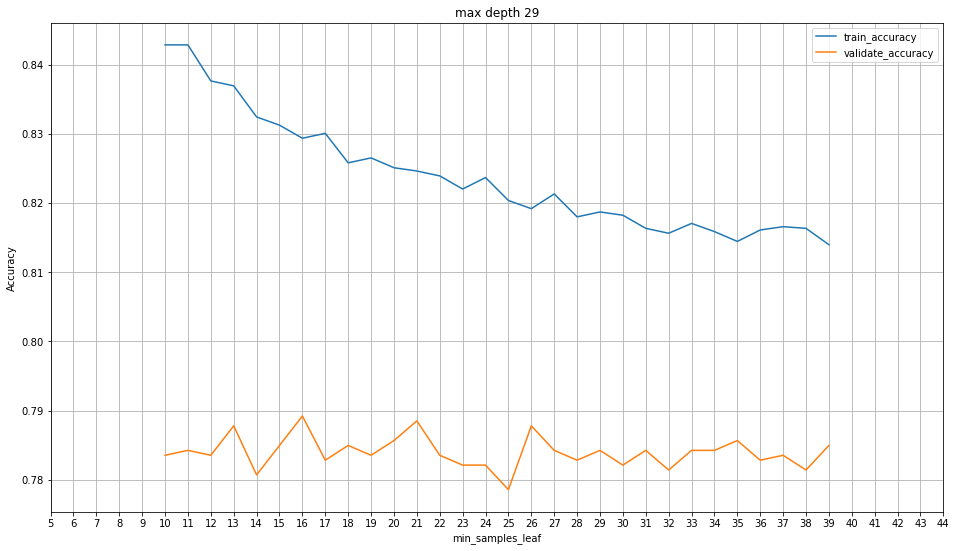

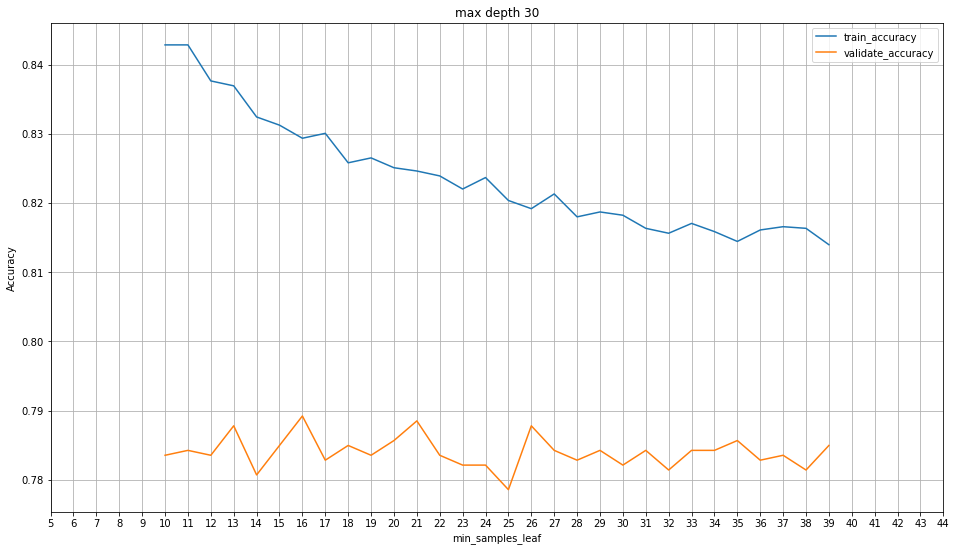

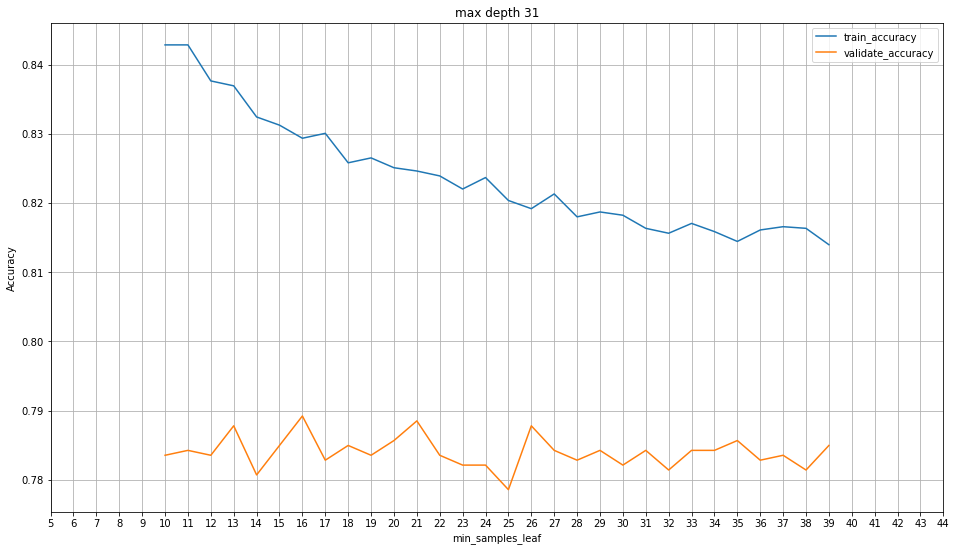

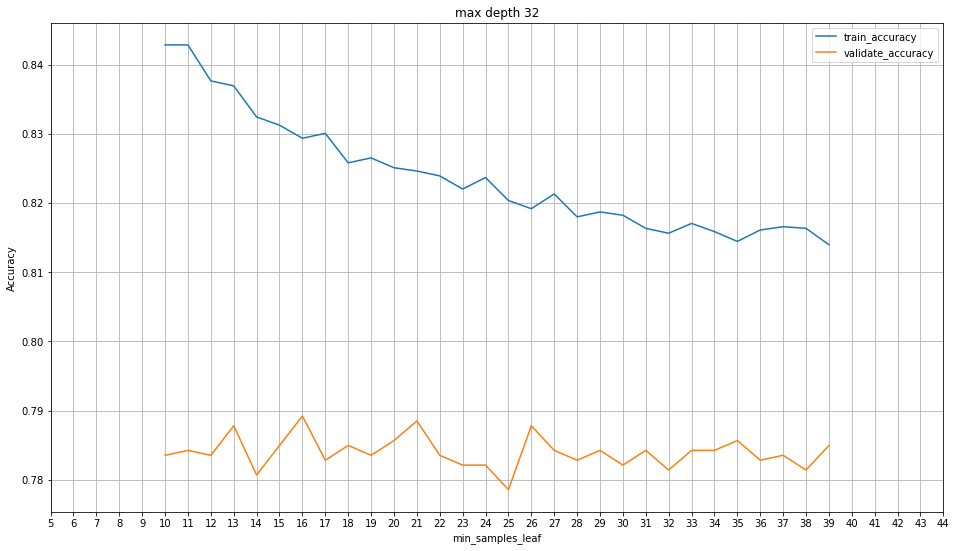

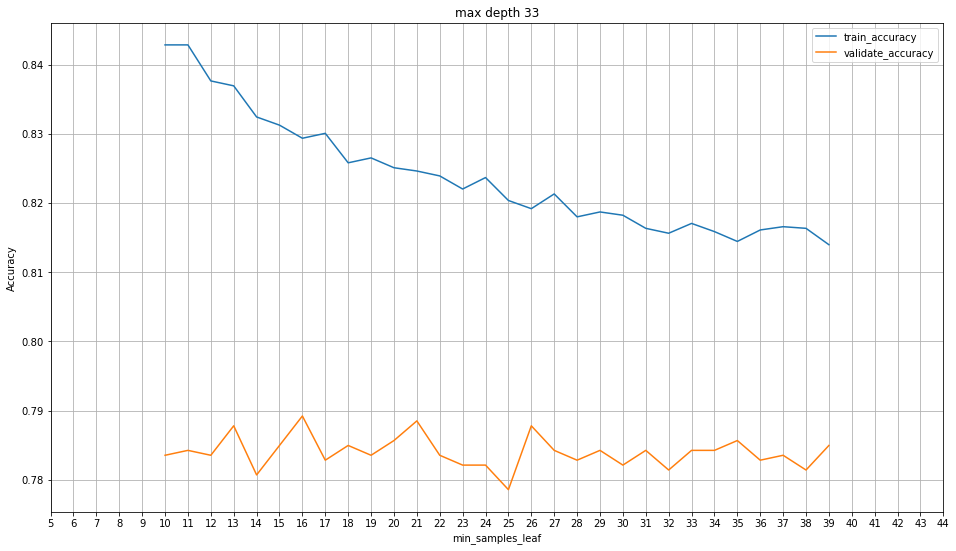

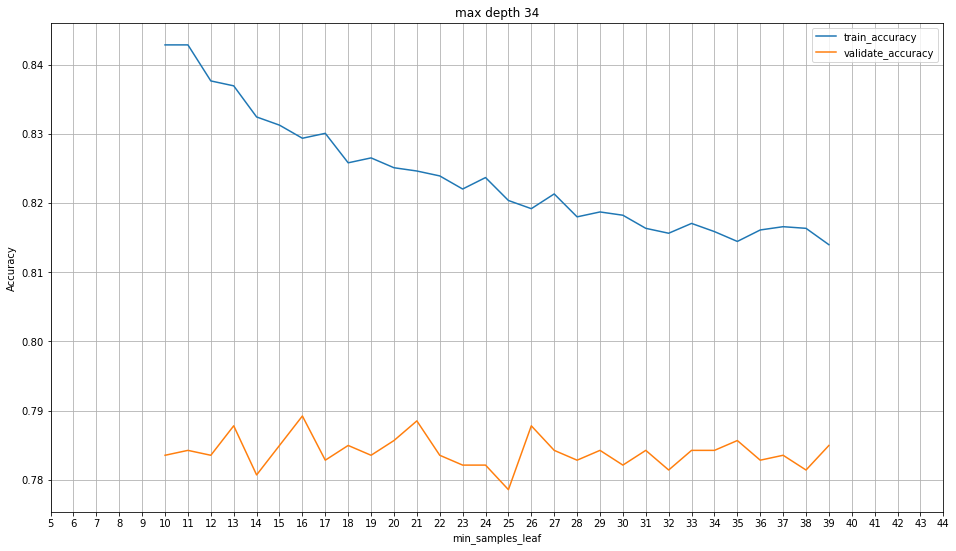

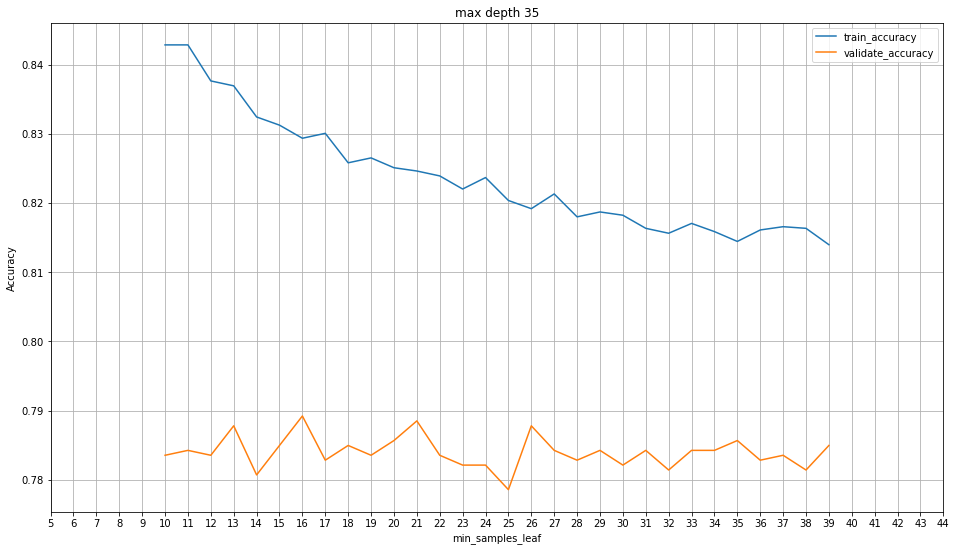

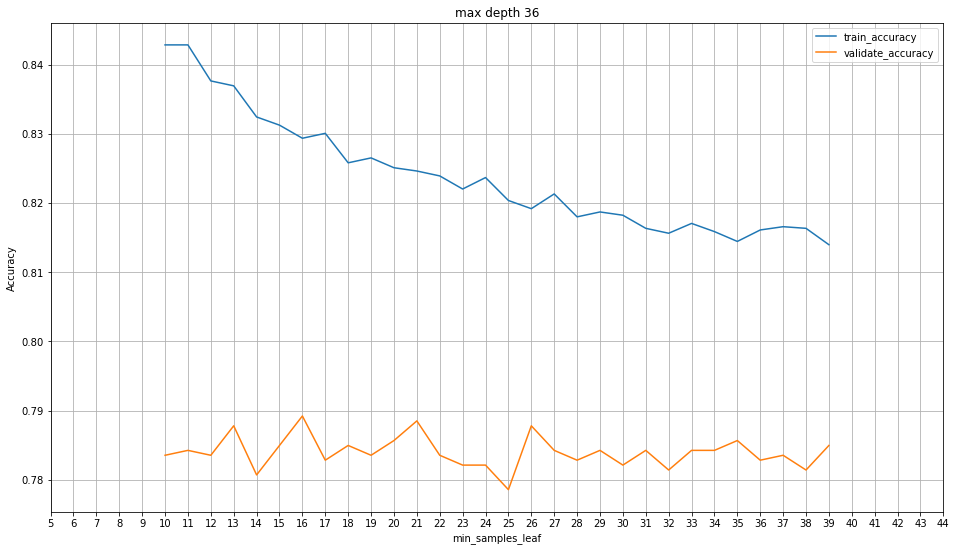

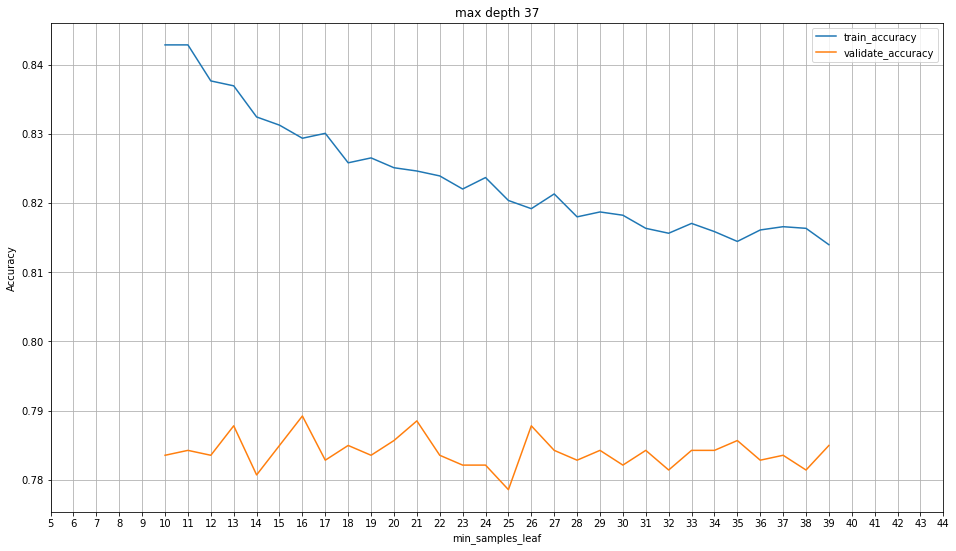

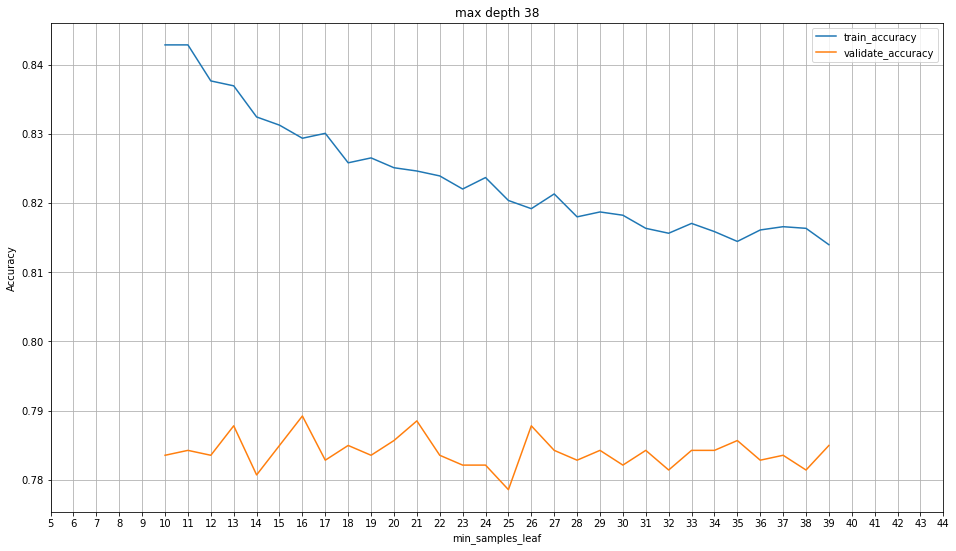

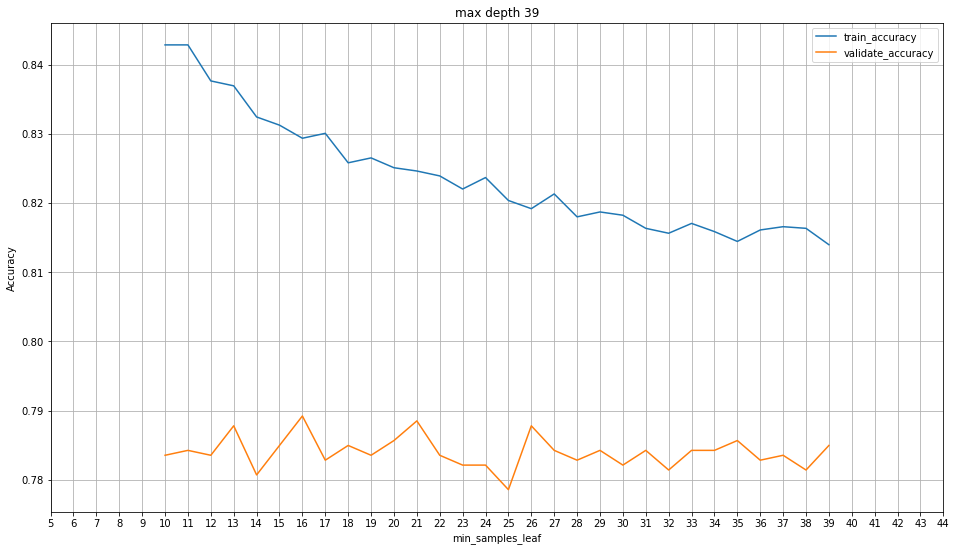

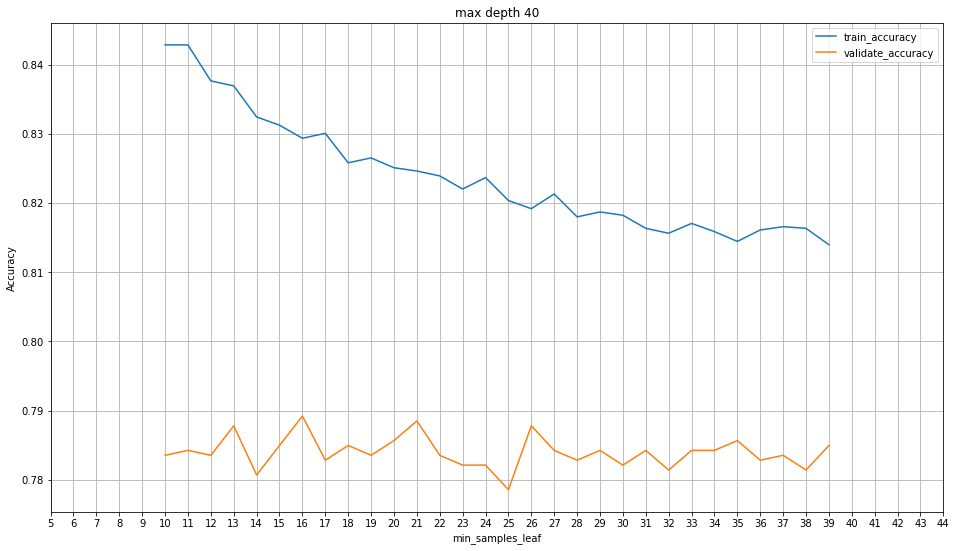

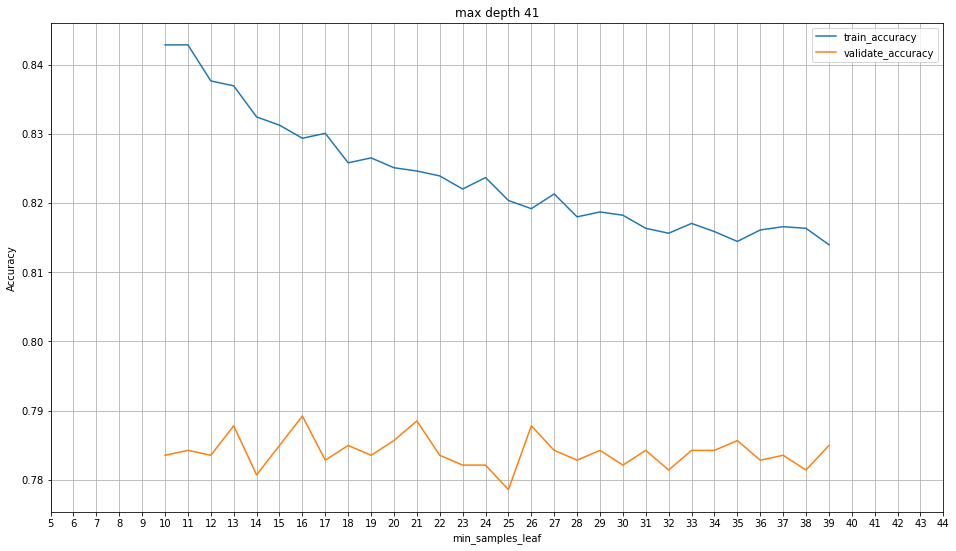

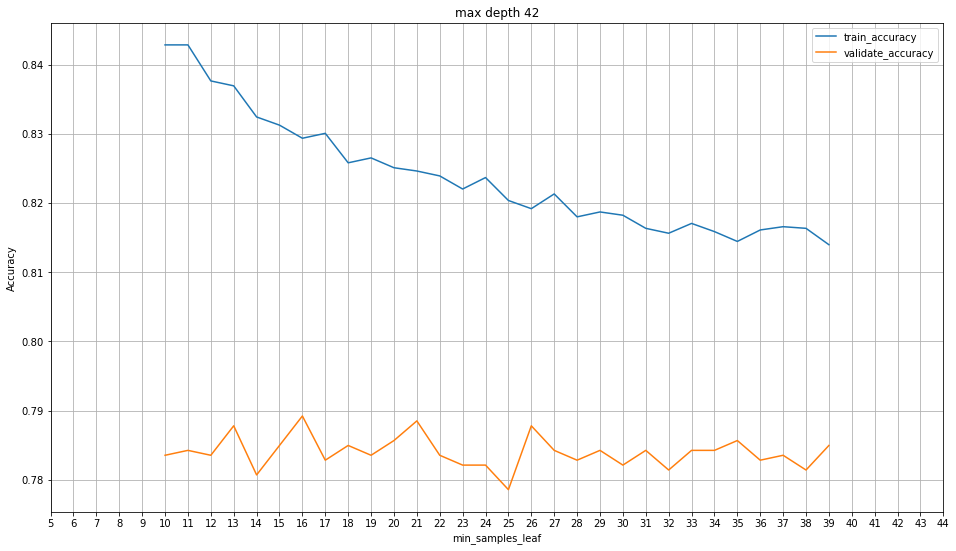

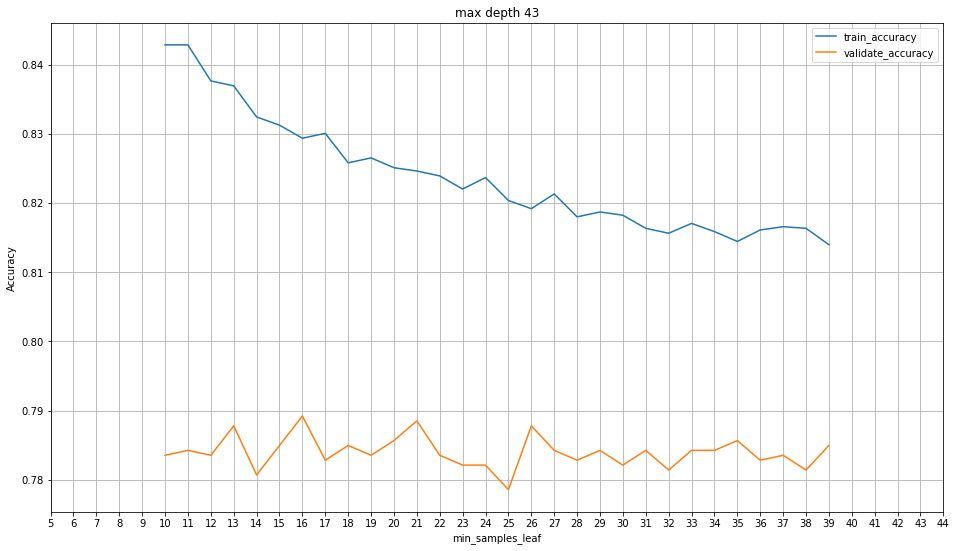

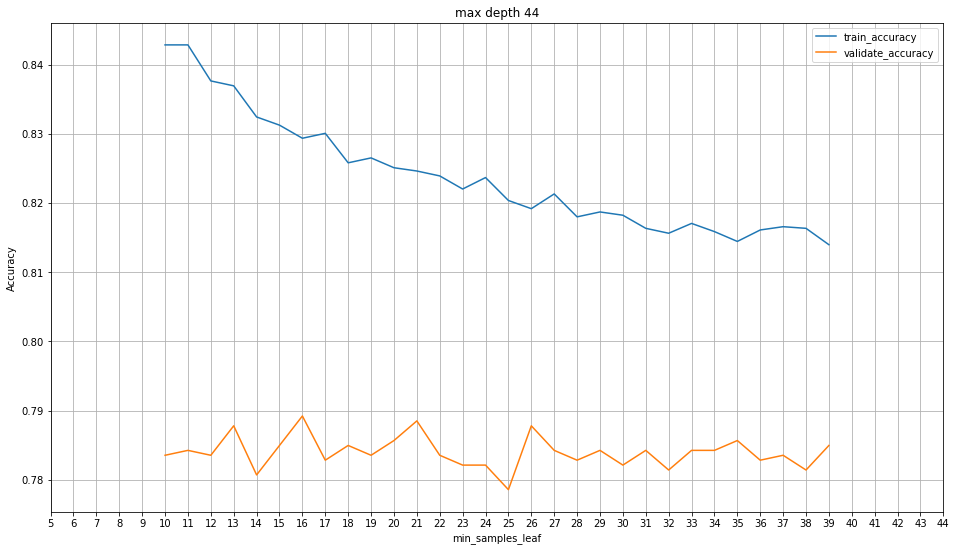

In [47]:
for i in range(5,45):
    sample = report_df[report_df.max_depth == i]
    title= 'max depth ' + str(i)
    
    sample.plot(x="min_samples_leaf", y=["train_accuracy", "validate_accuracy"],figsize = (16,9) )
    
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(5,45,1))
    plt.title(title)
    plt.grid()
    plt.show()

In [48]:
report_df[report_df.validate_accuracy == report_df.validate_accuracy.max()]

,min_samples_leaf,max_depth,train_accuracy,validate_accuracy,difference
46,11,11,0.841183,0.792051,0.049132


# conducted multiple experiments using the above code to test blocks of RF classifiers

### Current best combinations:  Train acc ~81, Val acc ~ 80:
    Features = 'senior_citizen',
             'tenure',
             'monthly_charges',
             'male',
             'partner',
             'dependents',
             'phone',
             'paperless_billing',
             'multiple_lines_yes',
             'online_security_yes',
             'online_backup_yes',
             'device_protection_yes',
             'tech_support_yes',
             'streaming_tv_yes',
             'streaming_movies_yes',
             'contract_type_month-to-month',
             'contract_type_one_year',
             'contract_type_two_year',
             'payment_type_bank_transfer_auto',
             'payment_type_credit_card_auto',
             'payment_type_electronic_check',
             'payment_type_mailed_check',
             'internet_type_dsl',
             'internet_type_fiber_optic',
             'internet_type_none',
             'addon_count']
             
     Min_leaf:29
     Max_depth: 

# reduced features to remove those that had weak correlation or were represented multiple times
### Current best combinations:  Train acc ~80, Val acc ~ 79:  minleaf: 39 maxdepth 30
 
#### features = 
            [ 'senior_citizen',
             'tenure',
             'monthly_charges',
             'partner',
             'dependents',
             'phone',
             'paperless_billing',
             'contract_type_month-to-month',
             'contract_type_one_year',
             'contract_type_two_year',
             'payment_type_bank_transfer_auto',
             'payment_type_credit_card_auto',
             'payment_type_electronic_check',
             'payment_type_mailed_check',
             'internet_type_dsl',
             'internet_type_fiber_optic',
             'internet_type_none',
             'addon_count']
             
             

#### train acc= 84, val acc = 80 minleaf= 37, maxdepth = 9

 ###### features =
             'monthly_charges',
             'phone',
             'paperless_billing',
             'contract_type_month-to-month',
             'contract_type_one_year',
             'contract_type_two_year',
             'payment_type_bank_transfer_auto',
             'payment_type_credit_card_auto',
             'payment_type_electronic_check',
             'payment_type_mailed_check',
             'internet_type_dsl',
               'internet_type_fiber_optic',
              'internet_type_none',
            

train acc 80, val acc78, minleaf

            'monthly_charges',
             'phone',
             'paperless_billing',
             'contract_type_month-to-month',
             'contract_type_one_year',
             'contract_type_two_year',  
             'payment_type_electronic_check',
               'internet_type_fiber_optic',
              'addon_count'

ALL features - max depth 19	minleaf 8	train0.822485	validate0.801987	

In [15]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=8,
                            n_estimators=100,
                            max_depth=8, 
                            random_state=123)

rf.fit(X_train, y_train)
importance = rf.feature_importances_


In [16]:
features = pd.DataFrame(features, columns = ['Feature'])
importance = pd.DataFrame(importance, columns = ['importance'])


In [17]:
ranking = pd.concat([features, importance], axis=1)


In [57]:
ranking.sort_values(by= 'importance', ascending = False)

,Feature,importance
8,paperless_billing,0.399580
30,contract_type_month-to-month,0.317981
35,payment_type_electronic_check,0.305699
38,internet_type_fiber_optic,0.280767
29,streaming_movies_yes,0.210255
0,senior_citizen,0.179569
12,online_security_no,0.161729
10,multiple_lines_no_phone,0.142913
21,tech_support_no,0.142073
26,streaming_tv_yes,0.109686


In [55]:
ranking.Feature.to_list()

['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'male',
 'partner',
 'dependents',
 'phone',
 'paperless_billing',
 'multiple_lines_no',
 'multiple_lines_no_phone',
 'multiple_lines_yes',
 'online_security_no',
 'online_security_no_internet',
 'online_security_yes',
 'online_backup_no',
 'online_backup_no_internet',
 'online_backup_yes',
 'device_protection_no',
 'device_protection_no_internet',
 'device_protection_yes',
 'tech_support_no',
 'tech_support_no_internet',
 'tech_support_yes',
 'streaming_tv_no',
 'streaming_tv_no_internet',
 'streaming_tv_yes',
 'streaming_movies_no',
 'streaming_movies_no_internet',
 'streaming_movies_yes',
 'contract_type_month-to-month',
 'contract_type_one_year',
 'contract_type_two_year',
 'payment_type_bank_transfer_auto',
 'payment_type_credit_card_auto',
 'payment_type_electronic_check',
 'payment_type_mailed_check',
 'internet_type_dsl',
 'internet_type_fiber_optic',
 'internet_type_none',
 'addon_count']

# ranking above can give us insights for what features to use in other models


# Logistic Regression 

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
features = [
             'senior_citizen',
             'tenure',
             'monthly_charges',
             'total_charges',
             'male',
             'partner',
             'dependents',
             'phone',
             'paperless_billing',
             'multiple_lines_no',
             'multiple_lines_no_phone',
             'multiple_lines_yes',
             'online_security_no',
             'online_security_no_internet',
             'online_security_yes',
             'online_backup_no',
             'online_backup_no_internet',
             'online_backup_yes',
             'device_protection_no',
             'device_protection_no_internet',
             'device_protection_yes',
             'tech_support_no',
             'tech_support_no_internet',
             'tech_support_yes',
             'streaming_tv_no',
             'streaming_tv_no_internet',
             'streaming_tv_yes',
             'streaming_movies_no',
             'streaming_movies_no_internet',
             'streaming_movies_yes',
             'contract_type_month-to-month',
             'contract_type_one_year',
             'contract_type_two_year',
             'payment_type_bank_transfer_auto',
             'payment_type_credit_card_auto',
             'payment_type_electronic_check',
             'payment_type_mailed_check',
             'internet_type_dsl',
             'internet_type_fiber_optic',
             'internet_type_none',
             'addon_count']

In [21]:
X_train = train[features]
y_train = train.churn

X_validate = validate[features]
y_validate = validate.churn


In [22]:
logit = LogisticRegression(C=1, random_state=333)
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=333)

In [23]:
# rank feature importance
importance = logit.coef_[0]
feats = pd.DataFrame(features, columns = ['Feature'])
importance = pd.DataFrame(importance, columns = ['importance'])
ranking = pd.concat([feats, importance], axis=1)
ranking.sort_values(by= 'importance', ascending = False)

,Feature,importance
8,paperless_billing,0.399580
30,contract_type_month-to-month,0.317981
35,payment_type_electronic_check,0.305699
38,internet_type_fiber_optic,0.280767
29,streaming_movies_yes,0.210255
0,senior_citizen,0.179569
12,online_security_no,0.161729
10,multiple_lines_no_phone,0.142913
21,tech_support_no,0.142073
26,streaming_tv_yes,0.109686


In [24]:

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on validation set: {:.2f}'
     .format(logit.score(X_validate, y_validate)))


Accuracy of Logistic Regression classifier on training set: 0.81
Accuracy of Logistic Regression classifier on validation set: 0.78


Above is the best model and feature set found for LR classifier

# KNN testing

In [25]:
from sklearn.neighbors import KNeighborsClassifier


In [26]:
features = [
             'senior_citizen',
             'tenure',
             'monthly_charges',
             'total_charges',
             'male',
             'partner',
             'dependents',
             'phone',
             'paperless_billing',
             
             'multiple_lines_no',
             'multiple_lines_no_phone',
             'multiple_lines_yes',
             'online_security_no',
             'online_security_no_internet',
             'online_security_yes',
             'online_backup_no',
             'online_backup_no_internet',
             'online_backup_yes',
             'device_protection_no',
             'device_protection_no_internet',
             'device_protection_yes',
             'tech_support_no',
             'tech_support_no_internet',
             'tech_support_yes',
             'streaming_tv_no',
             'streaming_tv_no_internet',
             'streaming_tv_yes',
             'streaming_movies_no',
             'streaming_movies_no_internet',
             'streaming_movies_yes',
             'contract_type_month-to-month',
             'contract_type_one_year',
             'contract_type_two_year',
             'payment_type_bank_transfer_auto',
             'payment_type_credit_card_auto',
             'payment_type_electronic_check',
             'payment_type_mailed_check',
             'internet_type_dsl',
             'internet_type_fiber_optic',
             'internet_type_none',
             'addon_count']

In [27]:
X_train = train[features]
y_train = train.churn

X_validate = validate[features]
y_validate = validate.churn

In [28]:
knn = KNeighborsClassifier(n_neighbors=23, weights='uniform')
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=23)

In [29]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))


Accuracy of KNN classifier on training set: 0.80
Accuracy of KNN classifier on training set: 0.77


In [30]:
models_acc = []

for x in range(1,31):

    #make it
    knn = KNeighborsClassifier(n_neighbors=x)

    #fit it
    knn = knn.fit(X_train, y_train)

#     predict it
    y_pred = knn.predict(X_train)
#     y_pred_val = knn.predict(X_validate)
    
    #score it
    acc = knn.score(X_train, y_train)
    acc_val = knn.score(X_validate, y_validate)
    f1 = f1_score(y_train, y_pred)
    
    models_acc.append([x, acc, acc_val, f1])

In [31]:
df_models = pd.DataFrame(models_acc, columns=['neighbors', 'train_accuracy',
                                  'validate_accuracy', 'f1 score'])
df_models

,neighbors,train_accuracy,validate_accuracy,f1 score
0,1,0.998107,0.713982,0.996438
1,2,0.865799,0.749468,0.661896
2,3,0.863905,0.743790,0.728389
3,4,0.844260,0.758694,0.628249
4,5,0.838817,0.749468,0.662035
5,6,0.826746,0.767211,0.588301
6,7,0.823669,0.755855,0.613790
7,8,0.823669,0.772889,0.581225
8,9,0.820118,0.760823,0.603754
9,10,0.818225,0.764372,0.569024


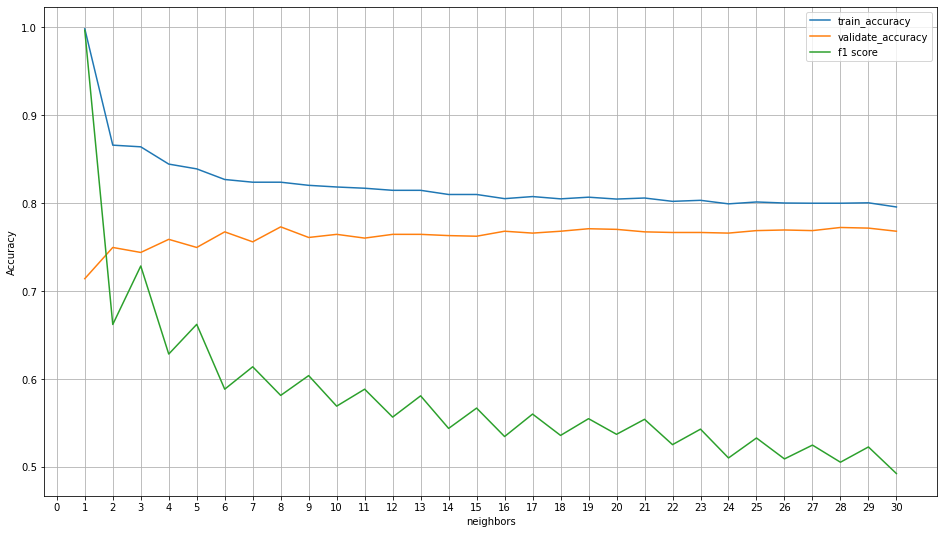

In [32]:
df_models.set_index('neighbors').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,31,1))
plt.grid()

In [33]:
# default settings and full features, best model is 16 neighbors (train=80, val = 79)
# removing columns had better accuracy as neighbors approached 20, but overall reduced accuracy (78 , 76)
# changing weights to 'distance' overfit the model throughout the range of neighbors (train 98, val 76)

In [ ]:
# Top 3 models

In [3]:
64/4

16.0